Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Question 1:** Read the train and test datafiles

In [2]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Assignment 2/AndroidAppsTrainSmall-2024.csv', header=None)
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Assignment 2/AndroidAppsTestSmall-2024.csv', header=None)

Drop "NULL" values from both training and testing datasets, if there are any.

In [5]:
df_train_cleaned = df_train.dropna()
df_test_cleaned = df_test.dropna()

Import important packages.

In [6]:
import torch
import numpy as np
import torch.nn as nn #importing library for neural networks
import matplotlib.pyplot as plt

Define x_train, x_test and y_train, y_test

In [7]:
x_train = df_train_cleaned.iloc[:,:471]
y_train = df_train_cleaned.iloc[:,471:472]
x_test = df_test_cleaned.iloc[:,:471]
y_test = df_test_cleaned.iloc[:,471:472]

I am not performing data transformation as the data is already in 0-1 range.

Transform numpy data to tensors and data type to float.

In [8]:
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

In [10]:
x_train = x_train.float()
y_train = y_train.float()
x_test = x_test.float()
y_test = y_test.float()

**Question 2:** Model building

Define the functions.

In [12]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.logistic = torch.nn.Linear(in_features=471, out_features=1)
  def forward(self, X):
    y_predicted=torch.sigmoid(self.logistic(X))
    return y_predicted

Initialize the model.

Define a funtion "train_model" which inputs the learning rate and number of iterations.

In [39]:
def train_model(step_size, iter):
    model = Model()
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=step_size)

    loss_train_list = []
    loss_test_list = []
    accuracy_train_list = []
    accuracy_test_list = []

    for i in range(iter):
        # Forward pass and loss calculation for training data
        y_pred_train = model(x_train)
        loss_train = criterion(y_pred_train, y_train)
        loss_train_list.append(loss_train.item())
        y_pred_train_class = y_pred_train.round()
        # Accuracy for test data
        accuracy_train = (y_pred_train_class.eq(y_train).sum()) / float(y_train.shape[0])
        accuracy_train_list.append(accuracy_train.item())

        # Backpropagation and optimization
        loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Loss and accuracy on test data
        with torch.no_grad():
            y_pred_test = model(x_test)
            loss_test = criterion(y_pred_test, y_test)
            loss_test_list.append(loss_test.item())

            # Test accuracy
            y_pred_test_class = y_pred_test.round()
            accuracy_test = (y_pred_test_class.eq(y_test).sum()) / float(y_test.shape[0])
            accuracy_test_list.append(accuracy_test.item())



    return accuracy_train.item(), accuracy_test.item(), loss_train_list, loss_test_list, accuracy_train_list, accuracy_test_list

**Question 3:** Accuracy

1. Define the hyperparameters - learning rate and number of iterations.
2. Run the model to obtain loss and accuracy for training and testing.


In [36]:
lr_1 = 0.1
lr_2 = 0.01
iter = 10000
train_accuracy_1, test_accuracy_1, loss_train_1, loss_test_1, accuracy_train_1, accuracy_test_1 = train_model(lr_1, iter)
train_accuracy_2, test_accuracy_2, loss_train_2, loss_test_2, accuracy_train_2, accuracy_test_2 = train_model(lr_2, iter)

Print the training and testing accuracy for LR = 0.1.

In [37]:
train_accuracy_1, test_accuracy_1

(0.9743635058403015, 0.9711229801177979)

Print the training and testing accuracy for LR = 0.01.

In [38]:
train_accuracy_2, test_accuracy_2

(0.9631255269050598, 0.9614973068237305)

**Question 4** Plot the learning curves.

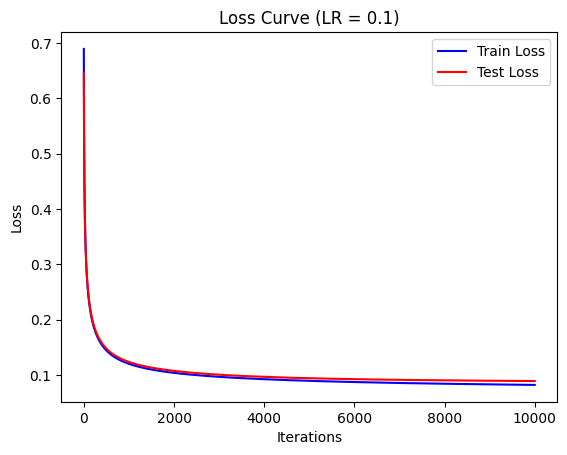

In [27]:
plt.plot(loss_train_1, label="Train Loss", color="blue")
plt.plot(loss_test_1, label="Test Loss", color="red")
plt.title("Loss Curve (LR = 0.1)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()


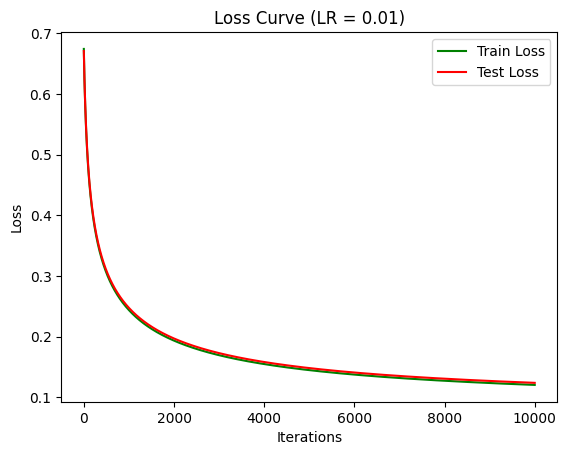

In [28]:
plt.plot(loss_train_2, label="Train Loss", color="green")
plt.plot(loss_test_2, label="Test Loss", color="red")
plt.title("Loss Curve (LR = 0.01)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

Plot the accuracy curves.

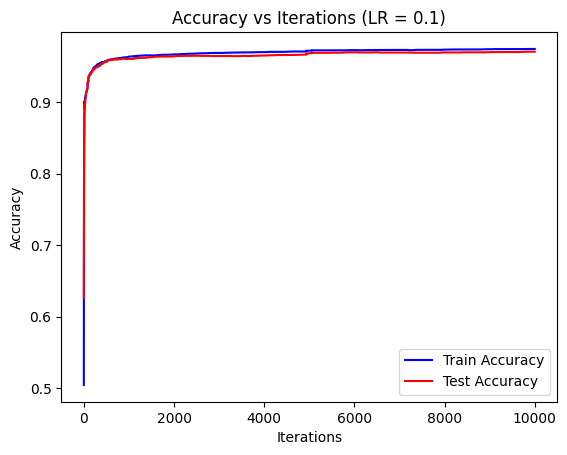

In [29]:
plt.plot(accuracy_train_1, label="Train Accuracy", color="blue")
plt.plot(accuracy_test_1, label="Test Accuracy", color="red")
plt.title("Accuracy vs Iterations (LR = 0.1)")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()

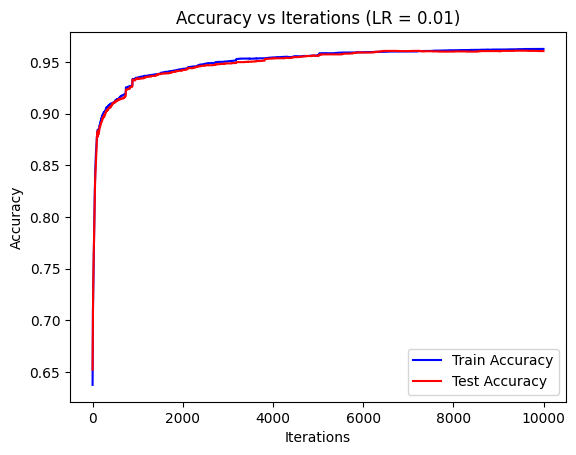

In [30]:
plt.plot(accuracy_train_2, label="Train Accuracy", color="blue")
plt.plot(accuracy_test_2, label="Test Accuracy", color="red")
plt.title("Accuracy vs Iterations (LR = 0.01)")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()

**Question 5:** Analysis of accuracy of training and testing data.

1. For LR = 0.1, training accuracy = 0.974 (0.9743635058403015) and testing accuracy =  0.971 (0.9711229801177979). These two accuracies are high and quite close to each other, which shows that the model fits well for this learning rate.
2. For LR = 0.01, training accuracy = 0.963 (0.9631255269050598) and testing accuuracy = 0.961 (0.9614973068237305). These two accuracies are also high and close to each other, indicating the goodness of fit in the data.

Comparison of loss curves in different learning rates:

When learning rate was 0.1, the loss starts at 0.7 and shows rapid decrease within the first 200 epochs. The curve converges after epochs of 200, which means that the ideal number of epochs is 200. The learning rate is higher, which allows for faster convergence.

When the learning rate was reduced to 0.01, the loss starts at similar value of 1.8, and decreased with increase in epochs. After around 1000 epochs, rate of loss reduction slows down as the training continues. The learning is steady and the model converges at this learning rate and the slow learning rate means that the model takes significantly more time to converge. The final loss is around 0.1, which is similar the learning rate of 0.1.